# Stock Price Prediction for JPMorgan Chase & Co

# The stock price will be 115.49 at 12/31/2019.
#### Used the prediction at 01/01/2020 for 12/31/2019.

### First Prediction: 178.3 (From Tableau "What-If" assignment)
### Second Prediction: 112.75 (Time Series)
### Third Prediction: 116.03 (Linear Regression, EFF_log, Unemployment_log, GDP_log )
### Fourth Prediction: 103.50 (Random Forest Regression)

In [177]:
val = [['First Prediction', 178.3, 0.05], ['Second Prediction', 112.75, 0.35],
       ['Third Prediction', 116.03, 0.40], ['Fourth Prediction', 103.50, 0.20]]
Final_Prediction = pd.DataFrame(val, columns = ['Predictions', 'Price', 'Weight'])
Final_Prediction['Final'] = Final_Prediction['Price'] * Final_Prediction['Weight']
Final_Prediction

,Predictions,Price,Weight,Final
0,First Prediction,178.30,0.05,8.9150
1,Second Prediction,112.75,0.35,39.4625
2,Third Prediction,116.03,0.40,46.4120
3,Fourth Prediction,103.50,0.20,20.7000


In [178]:
print('The final predictoin of the stock price for JPMC at 12/31/2019 is ' + str(round(sum(Final_Prediction['Final']), 2)) + '.')

The final predictoin of the stock price for JPMC at 12/31/2019 is 115.49.


In [179]:
import pandas as pd
import numpy as np
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
from scipy import stats
import seaborn as sns
import warnings
from math import log
from sklearn import linear_model
print ('Packages are successfully loaded.')

Packages are successfully loaded.


In [284]:
daily_price = pd.read_csv('JPM.csv')

In [285]:
daily_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/30/12,43.330002,43.369999,42.540001,42.980000,35.732433,23518000
1,5/1/12,43.000000,44.240002,42.959999,43.790001,36.405849,26359700
2,5/2/12,43.459999,43.529999,42.840000,43.200001,35.915333,22462200
3,5/3/12,43.380001,43.389999,42.669998,43.009998,35.757378,19536400
4,5/4/12,42.330002,42.680000,41.709999,41.750000,34.709858,31279900


#### In this case, we only need the Date and the Ajd Close, maybe also the Volume.

In [286]:
daily_price = daily_price[['Date', 'Adj Close', 'Volume']]

In [287]:
daily_price.head()

,Date,Adj Close,Volume
0,4/30/12,35.732433,23518000
1,5/1/12,36.405849,26359700
2,5/2/12,35.915333,22462200
3,5/3/12,35.757378,19536400
4,5/4/12,34.709858,31279900


## Before we add any varibles, let's do a pure Time Series model on the stock price.

In [288]:
daily_price['Date'] = pd.to_datetime(daily_price['Date'])

In [289]:
daily_price = daily_price.set_index('Date')

In [290]:
y = daily_price['Adj Close'].resample('MS').mean()

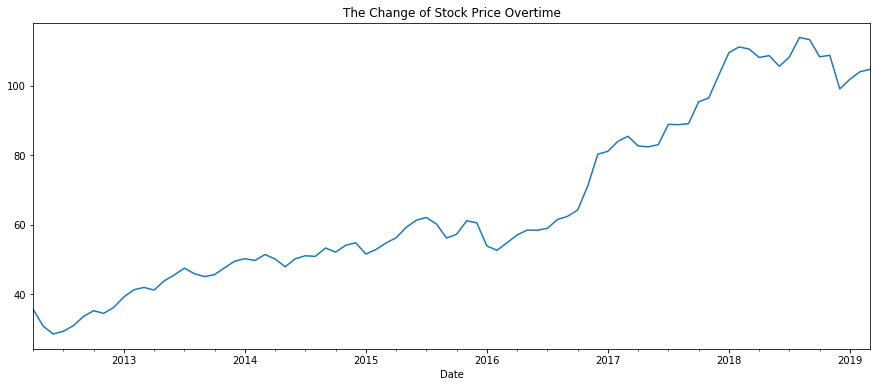

In [291]:
y.plot(figsize=(15, 6))
plt.title('The Change of Stock Price Overtime')
plt.show()

#### The stock price has seasonality, we will look into this later.

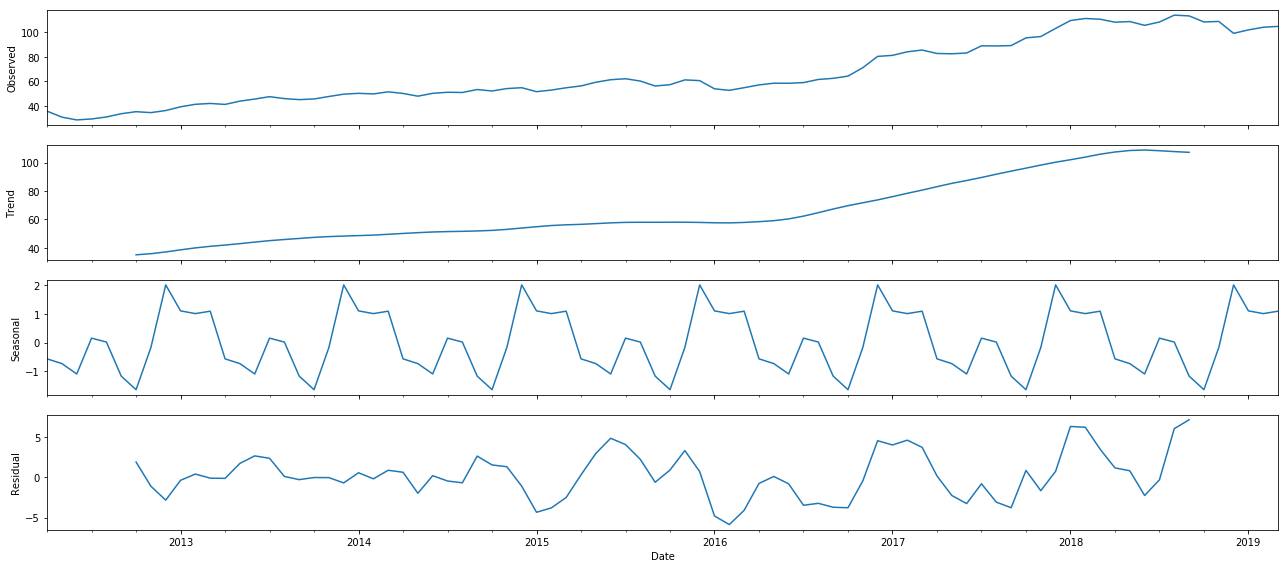

In [292]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### We want to find the best seasonality, trend, and noise in the model:

In [293]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [294]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:945.1184372588299
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:756.5828335831125
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:598.45088557115
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:485.6274033055787
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:554.9327520715467
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:523.6343998644153
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:490.7017057587735
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:485.14667077694776
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:829.0182481883775
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:656.9218010329527
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:506.7321186856132
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:411.6390909668075
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:480.52612380785155


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:449.8499772451995
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:425.82666935088895
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:414.83387844478824
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:413.4064284840815
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:360.81982430356595
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:392.55305983001665
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:316.8283860841705
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:366.29096276723294
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:362.80745405999045
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:333.8144207320413
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:322.81198304959844
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:404.61152397436155
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:354.22762839069986
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:385.2304319120238
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:310.1436498366064
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:363.6997606117701
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:356.22128241404255
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:331.39424276416617

/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:363.9045811641295
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:401.6727905378539


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:341.34292910499687
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:363.7849660298588
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:365.5146435042144
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:335.1327424218971
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:325.4447534733876
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:407.3552497027147
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:358.2228055104331
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:390.0907905565274


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:334.23912479634515
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:362.5685957107967
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:360.04882690754096
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:332.49426821827313
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:319.3008468824029
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:408.834754405184
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:358.7593421859982
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:390.45982048168287
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:315.43595621328313
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:358.803404090137
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:360.6769214952652
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:326.4191077561148
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:321.9178633583235
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:406.6115188282992
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:355.83234366839554
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:386.1720355022837
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:312.0798535281042
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:360.66447787512294
ARIMA

# The lowest AIC value (suggests the model is neither overfitting or underfiting) is 312.08 with ARIMA (1, 1, 1) x (0, 1, 1, 12) 12.

In [295]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1914      0.784     -0.244      0.807      -1.727       1.344
ma.L1          0.4203      0.720      0.584      0.559      -0.991       1.831
ma.S.L12      -1.0000   1653.112     -0.001      1.000   -3241.039    3239.039
sigma2         9.4447   1.56e+04      0.001      1.000   -3.06e+04    3.06e+04


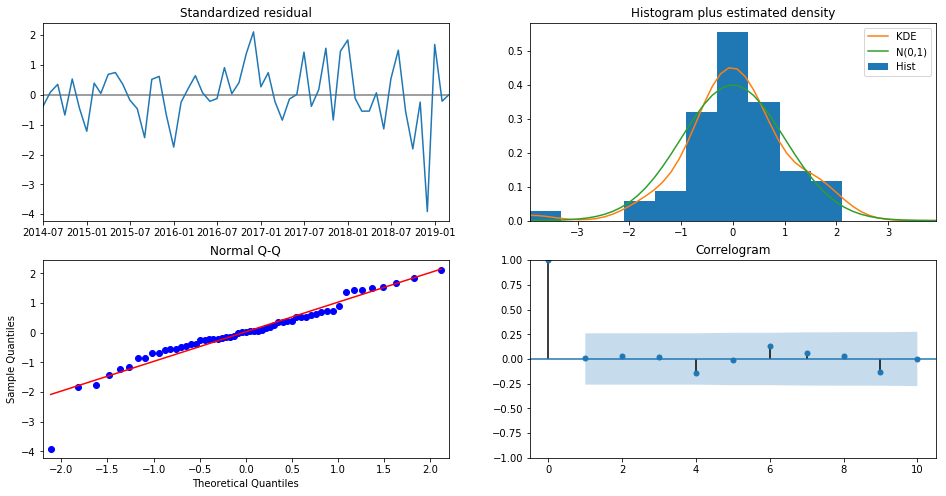

In [298]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

### The model fits okay. Although it's not prefect, since we haven't added anything into it, our model diagnostics suggests that the model residuals are near normally distributed.

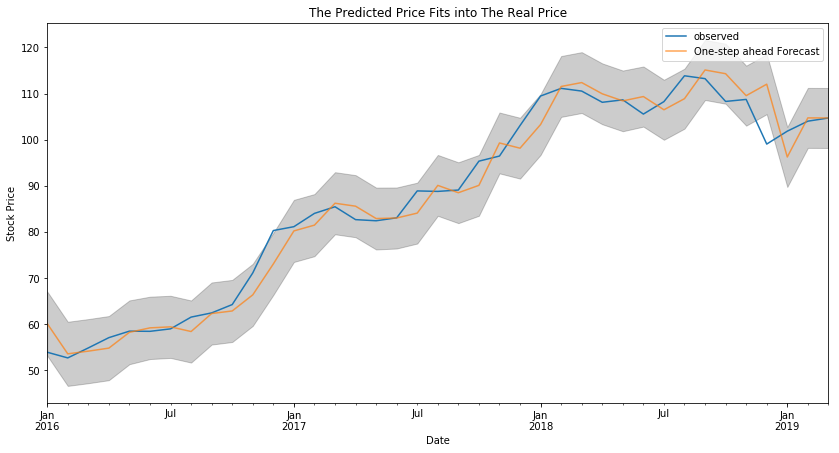

In [299]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.title('The Predicted Price Fits into The Real Price')
plt.show()

### The graph above shows the true stock price (in blue) compared to the forcast perdictions (in orange) from 01/01/2016 to date. The lines are not prefectly match, but it's close.

In [300]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error (RMSE) of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error (MSE) of our forecasts is 14.42
The Root Mean Squared Error (RMSE) of our forecasts is 3.8


### The smaller the MSE, the better the line fit. And the RMSE shows our model was able to forecast the average daily price in the test set within 7.89 of the real price. In my opinion, it's an acceptable difference for now.

/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


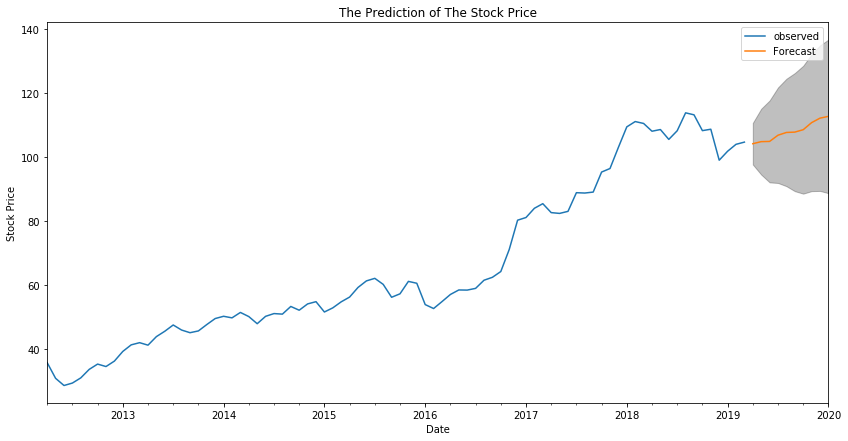

In [301]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.title('The Prediction of The Stock Price')
plt.show()

In [302]:
prediction = pd.DataFrame(pred_uc.predicted_mean, columns = ['Predicted Price'])

In [303]:
prediction

,Predicted Price
2019-04-01,104.200345
2019-05-01,104.847668
2019-06-01,104.917522
2019-07-01,106.862915
2019-08-01,107.719457
2019-09-01,107.831162
2019-10-01,108.580168
2019-11-01,110.792706
2019-12-01,112.195511
2020-01-01,112.748896


## We have our pure Time Series Prediction on JPMC's stock price, now, let's look into some varibles/indicators.

## For our prediction model, there are several variables can be easily determined:
**GDP** (https://fred.stlouisfed.org/series/CPIAUCSL)

**Interest Rate** (https://fred.stlouisfed.org/series/FEDFUNDS)

**Inflation Rate** (https://fred.stlouisfed.org/series/T10YIE)

**Unemployment Rate** (https://fred.stlouisfed.org/series/UNRATE)

**Consumer Interest** (https://fred.stlouisfed.org/series/CPIAUCSL)

## Here are two ways to do it, we can either treat those indicators as varibles and develop a linear regression or something similar, or predict each one of them and use the predictions to develop a model for the stock price.

## Let's do a good-old Linear Regression first and compare it with a Polynomial Regression.

In [304]:
gdp = pd.read_csv('GDP.csv', names = ['Date', 'GDP'], skiprows = 1)
gdp['Date'] = pd.to_datetime(gdp['Date'])

In [305]:
gdp = gdp[gdp['Date'] >= '2012-04-01']
gdp = gdp.set_index('Date')
gdp.head()

,GDP
Date,
2012-04-01,16198.807
2012-07-01,16220.667
2012-10-01,16239.138
2013-01-01,16382.964
2013-04-01,16403.180


In [306]:
un = pd.read_csv('UNRATE.csv', names = ['Date', 'Unemployment'], skiprows = 1)
un['Date'] = pd.to_datetime(un['Date'])

In [307]:
un = un[un['Date'] >= '2012-04-01']
un.head()

,Date,Unemployment
771,2012-04-01,8.2
772,2012-05-01,8.2
773,2012-06-01,8.2
774,2012-07-01,8.2
775,2012-08-01,8.1


In [308]:
df = pd.merge(gdp, un, how = 'right', left_index = True, right_on = ['Date'])

In [309]:
df.head()

,GDP,Date,Unemployment
771,16198.807,2012-04-01,8.2
772,NaN,2012-05-01,8.2
773,NaN,2012-06-01,8.2
774,16220.667,2012-07-01,8.2
775,NaN,2012-08-01,8.1


## Since the GDP value is quarterly, I filled the NaN with each quarter's GDP.

In [310]:
df.GDP.fillna(method = 'ffill', inplace = True)

In [311]:
df = df.set_index('Date')

In [312]:
cpi = pd.read_csv('CPI.csv', names = ['Date', 'CPI'], skiprows = 1)
cpi['Date'] = pd.to_datetime(cpi['Date'])

In [313]:
df = df.merge(cpi, left_index = True, right_on = ['Date'], how = 'left')

In [314]:
df = df.set_index('Date')

In [315]:
interest = pd.read_csv('Effective Federal Funds Rate.csv', names = ['Date', 'EFF'], skiprows = 1)
interest['Date'] = pd.to_datetime(interest['Date'])

In [316]:
df = df.merge(interest, left_index = True, right_on = ['Date'], how = 'left')

In [317]:
df = df.set_index('Date')

In [318]:
inflation = pd.read_csv('Inflation Rate.csv', names = ['Date', 'Inflation'], skiprows = 1)
inflation['Date'] = pd.to_datetime(inflation['Date'])

##### For some weird reasons, there are a lot of dots in inflation rate columns. In order to make the code works, I need to clean that out first.

In [319]:
a = []
for i in inflation.Inflation.values:
    try:
        a.append(float(i))
    except:
        a.append(float('Nan'))

In [320]:
inflation['Inflation'] = pd.DataFrame(a)

In [321]:
df = df.merge(inflation, left_index = True, right_on = ['Date'], how = 'left')

In [322]:
df = df.set_index('Date')

In [323]:
df.Inflation.fillna(method = 'ffill', inplace = True)
df.Inflation.fillna(method = 'bfill', inplace = True)

In [324]:
df.head()

,GDP,Unemployment,CPI,EFF,Inflation
Date,,,,,
2012-04-01,16198.807,8.2,229.187,0.14,2.26
2012-05-01,16198.807,8.2,228.713,0.16,2.26
2012-06-01,16198.807,8.2,228.524,0.16,2.06
2012-07-01,16220.667,8.2,228.590,0.16,2.06
2012-08-01,16220.667,8.1,229.918,0.13,2.23


## Just to make sure we don't have any missing values:

In [325]:
if df.empty:
    print('DataFrame is empty!')
elif df.isnull().any().any() == False:
    print('Good to go!')
else:
    print('There is ' + str(df.isnull().sum().sum()) + ' missing value.')
    print(df.isnull().any())

There is 1 missing value.
GDP             False
Unemployment    False
CPI              True
EFF             False
Inflation       False
dtype: bool


## I think for CPI, it is safe to carry the value forward for one month.

In [326]:
df.CPI.fillna(method = 'ffill', inplace = True)

In [327]:
if df.empty == True:
    print('DataFrame is empty!')
elif df.isnull().any().any() == False:
    print('Good to go!')
else:
    print('There is ' + str(df.isnull().sum().sum()) + ' missing value.')
    print(df.isnull().any())

Good to go!


#### Just in case, I exported the DataFrame as the csv file.

In [328]:
df.to_csv('data_01.csv')
print('The file successfully exported.')

The file successfully exported.


## Now, we have the dataframe that we can work on.

In [329]:
df = pd.read_csv('data_01.csv')

In [330]:
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df.head(10)

,GDP,Unemployment,CPI,EFF,Inflation
Date,,,,,
2012-04-01,16198.807,8.2,229.187,0.14,2.26
2012-05-01,16198.807,8.2,228.713,0.16,2.26
2012-06-01,16198.807,8.2,228.524,0.16,2.06
2012-07-01,16220.667,8.2,228.590,0.16,2.06
2012-08-01,16220.667,8.1,229.918,0.13,2.23
2012-09-01,16220.667,7.8,231.015,0.14,2.23
2012-10-01,16239.138,7.8,231.638,0.16,2.42
2012-11-01,16239.138,7.7,231.249,0.16,2.52
2012-12-01,16239.138,7.9,231.221,0.16,2.52


In [331]:
daily_price.head()

,Adj Close,Volume
Date,,
2012-04-30,35.732433,23518000
2012-05-01,36.405849,26359700
2012-05-02,35.915333,22462200
2012-05-03,35.757378,19536400
2012-05-04,34.709858,31279900


In [332]:
df1 = df.merge(daily_price, how = 'outer', left_index = True, right_index = True)

In [333]:
df1.fillna(method = 'ffill', inplace = True)
df1.fillna(method = 'bfill', inplace = True)

In [334]:
df1.head()

,GDP,Unemployment,CPI,EFF,Inflation,Adj Close,Volume
Date,,,,,,,
2012-04-01,16198.807,8.2,229.187,0.14,2.26,35.732433,23518000.0
2012-04-30,16198.807,8.2,229.187,0.14,2.26,35.732433,23518000.0
2012-05-01,16198.807,8.2,228.713,0.16,2.26,36.405849,26359700.0
2012-05-02,16198.807,8.2,228.713,0.16,2.26,35.915333,22462200.0
2012-05-03,16198.807,8.2,228.713,0.16,2.26,35.757378,19536400.0


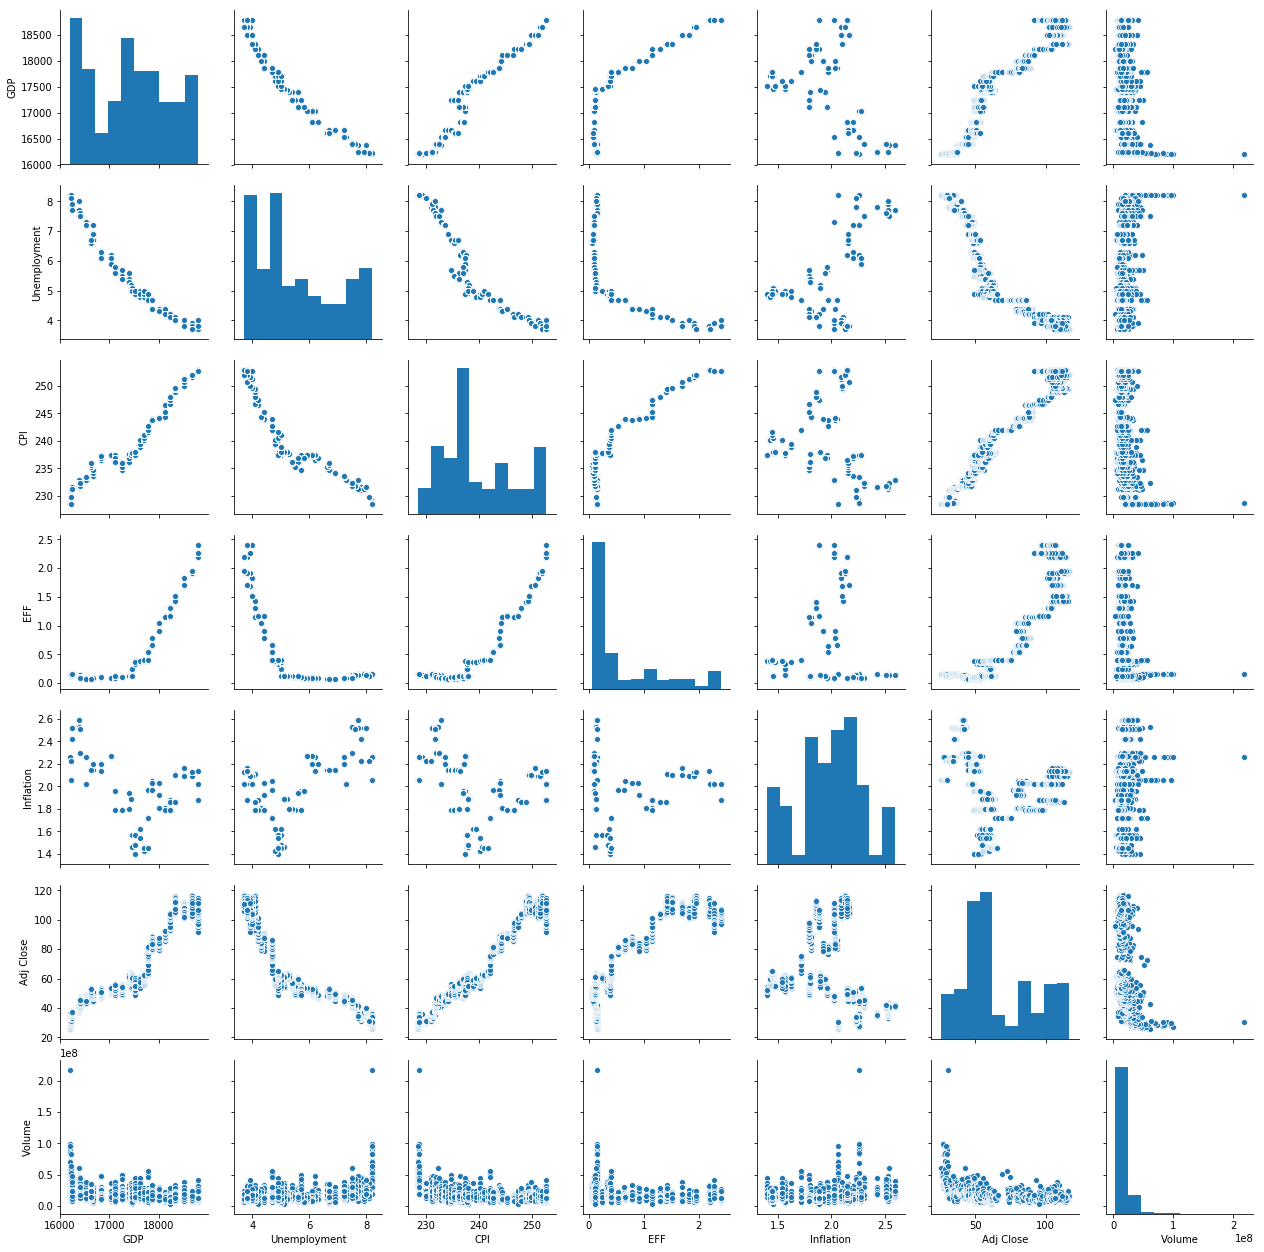

In [335]:
sns.pairplot(df1, kind="scatter", palette="Set2")
plt.show()

### There are some varibles are not really normally distributed, we can normalize them by taking the log. 
### But now, let's build our Linear Regression Model with GDP, Unemployment Rate, CPI, EFF and Inflation Rate first and see how does that turn out.

In [336]:
df1.keys()

Index(['GDP', 'Unemployment', 'CPI', 'EFF', 'Inflation', 'Adj Close',
       'Volume'],
      dtype='object')

In [337]:
var = df1[['GDP', 'Unemployment', 'CPI', 'EFF', 'Inflation']]
price = df1[['Adj Close']]

In [338]:
x = var
y = price
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.548e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        10:34:34   Log-Likelihood:                -5400.6
No. Observations:                1764   AIC:                         1.081e+04
Df Residuals:                    1759   BIC:                         1.084e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GDP             -0.0093      0.001     -6.709      0.000      -0.012      -0.007
Unemployment   -13.2052      0.264    -49.965      0.000     -13.724     -12.687
CPI              1.0988      0.109     10.089      0.000       0.885       1.312
EFF             12.7026      0.359     35.403      0.000      11.999      13.406
Inflation       15.2402      0.858     17.767      0.000      13.558      16.923
==============================================================================
Omnibus:                       15.770   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.156
Skew:                           0.126   Prob(JB):                     4.20e-05
Kurtosis:                       3.460   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The value of R-squared is really high, but as the warnings point out, some indicators may have some multicollinearities.

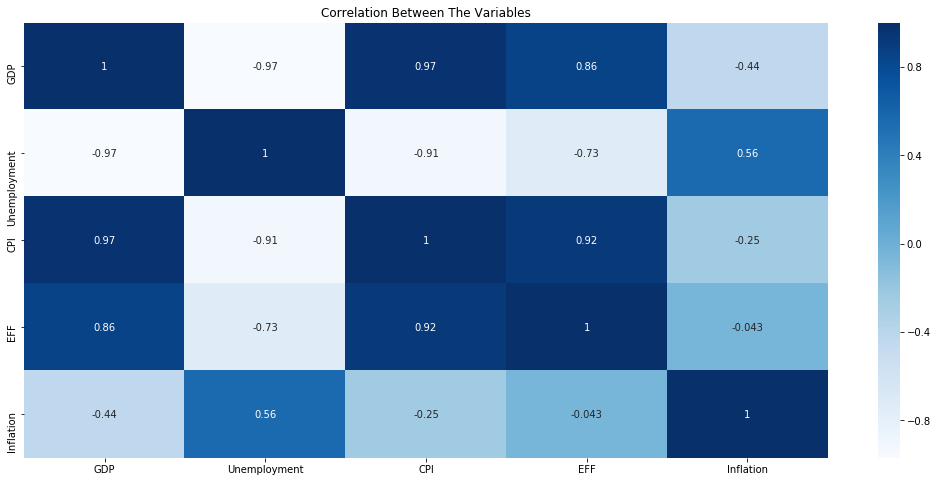

                   GDP  Unemployment       CPI       EFF  Inflation
GDP           1.000000     -0.969624  0.970430  0.860969  -0.438725
Unemployment -0.969624      1.000000 -0.913217 -0.727252   0.562869
CPI           0.970430     -0.913217  1.000000  0.920756  -0.252587
EFF           0.860969     -0.727252  0.920756  1.000000  -0.042646
Inflation    -0.438725      0.562869 -0.252587 -0.042646   1.000000


In [339]:
corr = x.corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Between The Variables')
plt.show()
print (x.corr())

## As we can see above, there are some indicators have very strong correlation. We may need to drop some to prevent the multicollinearities.

In [340]:
def takelog(x):
    df1['{}{}'.format(x.name, '_log')] = [log(x) for x in x.values]

In [341]:
dic = {'GDP', 'Unemployment', 'CPI', 'EFF', 'Inflation'}
for i in dic:
    j = df1[i]
    takelog(j)

In [342]:
df1.keys()

Index(['GDP', 'Unemployment', 'CPI', 'EFF', 'Inflation', 'Adj Close', 'Volume',
       'EFF_log', 'Unemployment_log', 'Inflation_log', 'GDP_log', 'CPI_log'],
      dtype='object')

In [343]:
df2 = df1[['EFF_log', 'GDP_log', 'CPI_log', 'Inflation_log', 'Unemployment_log', 'Adj Close']]

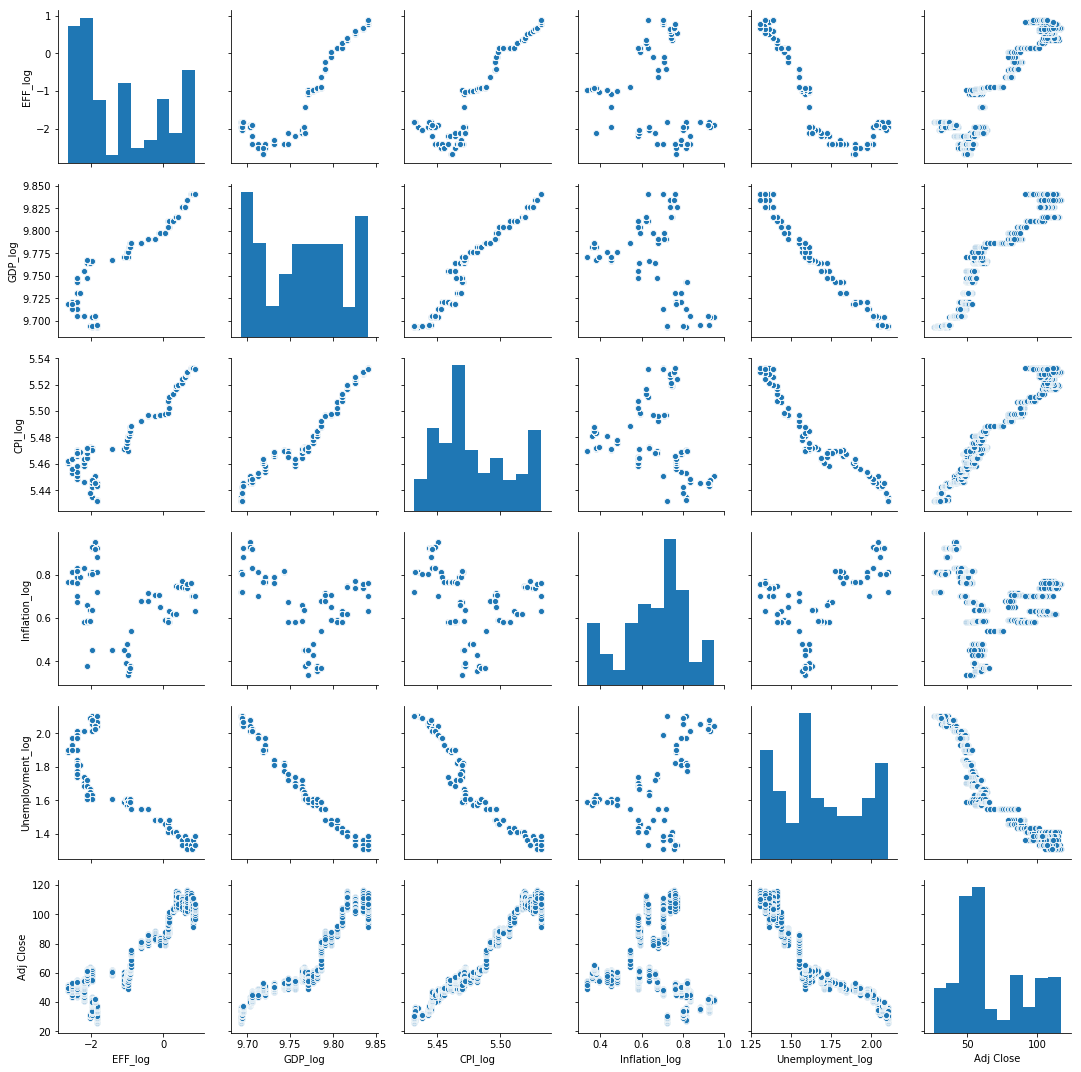

In [344]:
sns.pairplot(df2, kind="scatter", palette="Set2")
plt.show()

In [345]:
var = df2[['EFF_log', 'GDP_log', 'CPI_log', 'Inflation_log', 'Unemployment_log', 'Adj Close']]
price = df2[['Adj Close']]
x = var
y = price

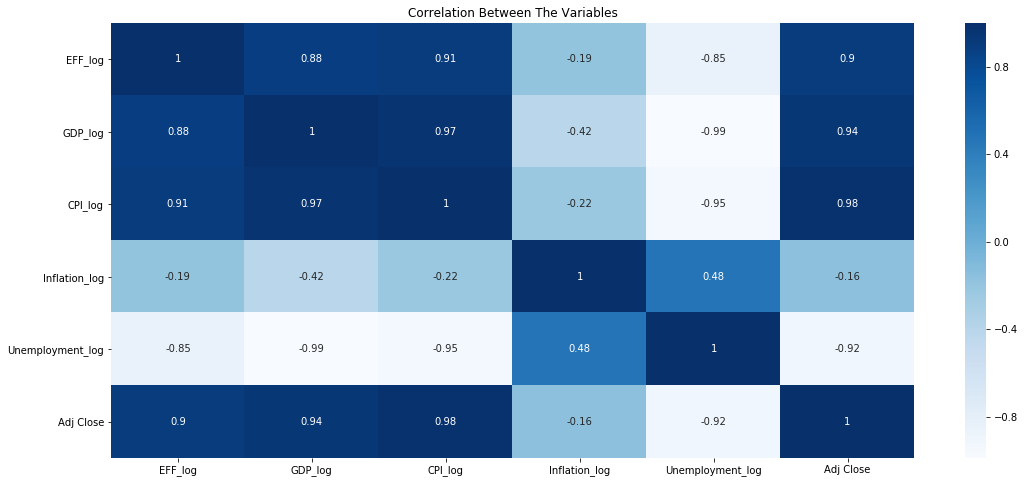

                   EFF_log   GDP_log   CPI_log  Inflation_log  \
EFF_log           1.000000  0.884029  0.905579      -0.185370   
GDP_log           0.884029  1.000000  0.968672      -0.416232   
CPI_log           0.905579  0.968672  1.000000      -0.223654   
Inflation_log    -0.185370 -0.416232 -0.223654       1.000000   
Unemployment_log -0.846281 -0.988901 -0.945401       0.477658   
Adj Close         0.904789  0.940725  0.976986      -0.155446   

                  Unemployment_log  Adj Close  
EFF_log                  -0.846281   0.904789  
GDP_log                  -0.988901   0.940725  
CPI_log                  -0.945401   0.976986  
Inflation_log             0.477658  -0.155446  
Unemployment_log          1.000000  -0.918485  
Adj Close                -0.918485   1.000000  


In [346]:
corr = x.corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title('Correlation Between The Variables')
plt.show()
print (x.corr())

### Let's drop CPI and Inflation Rate, since they have very strong correlation with a lot of the varibles.

In [387]:
var = df2[['EFF_log', 'GDP_log', 'Unemployment_log']]
price = df2[['Adj Close']]
x = var
y = price

In [388]:
model = sm.OLS(y, x).fit()
print(model.params)
print(model.summary())

EFF_log              9.449785
GDP_log             16.907894
Unemployment_log   -52.183284
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.715e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:45:15   Log-Likelihood:                -6135.6
No. Observations:                1764   AIC:                         1.228e+04
Df Residuals:                    1761   BIC:                         1.229e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [386]:
model.

SyntaxError: invalid syntax (<ipython-input-386-e5c9403477cf>, line 1)

### With a R-squared of 0.988, it seems a good model.

# Let's find the varibles for the model and make our prediction. Here, I will conduct a Time Series prediction for the GDP, EFF, and Unemployment.

In [350]:
df2.keys()

Index(['EFF_log', 'GDP_log', 'CPI_log', 'Inflation_log', 'Unemployment_log',
       'Adj Close'],
      dtype='object')

In [351]:
y = df['GDP'].resample('MS').mean()
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1836.358155817954
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1572.7324774502638
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1046.944612916299
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:850.0433885077698
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:875.8594481408794


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:830.062240352011
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:787.9197934928926
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:777.1345261503072
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1758.1553665946012
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4599.934374507447
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:947.5464038482214
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:767.3039470586956
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:826.5238232063479


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:774.4885311693224
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:747.6323919983366


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:723.3216409998524
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:910.3061687877967
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:749.9575019161988
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:748.3119304144201


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:595.8118882968934
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:752.7062088100305
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:716.1007126266363
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:587.512794585005


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:580.8912253735062
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:902.0863126359407
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:742.2903430022894
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:740.48853852366
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:548.4975276659108
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:754.7062088109001
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:708.9561770911675
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:589.5127945898789
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:559.2680819535315
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:900.8154072347932
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:775.743483087899
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:760.1141183588551
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:565.0226786952493
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:757.7620706298441
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:720.8939331571669
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:589.4641587161719


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:594.4070799897892
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:878.6048334831341
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:760.9781920794106
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:752.3051944108255
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:558.4491520688489
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:759.5604283731116
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:713.5597026638131
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:591.4640515905838


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:597.942652487745
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:912.3061674180651
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:751.9575019760335
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:750.3119295754623
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:557.0810018035194
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:745.0032288688833
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:718.1007128231663
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:580.443561127004
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:568.4062395019192
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:904.0863126320078
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:744.2903429846313
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:742.4885330182117
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:550.497527596654
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:747.0032287136072
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:710.9561770401857
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:582.4435585002242
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:561.2680844357808


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       -4.66e-05   1.24e+05  -3.75e-10      1.000   -2.44e+05    2.44e+05
ma.L1       4.139e-05   1.23e+05   3.35e-10      1.000   -2.42e+05    2.42e+05
ma.S.L12      -1.0000   3146.946     -0.000      1.000   -6168.901    6166.901
sigma2       735.2369   2.31e+06      0.000      1.000   -4.53e+06    4.54e+06


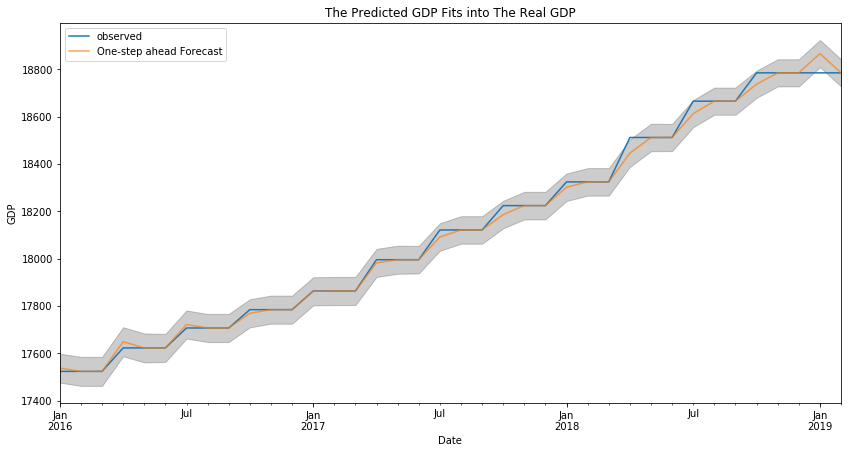

The Mean Squared Error (MSE) of our forecasts is 537.58
The Root Mean Squared Error (RMSE) of our forecasts is 23.19


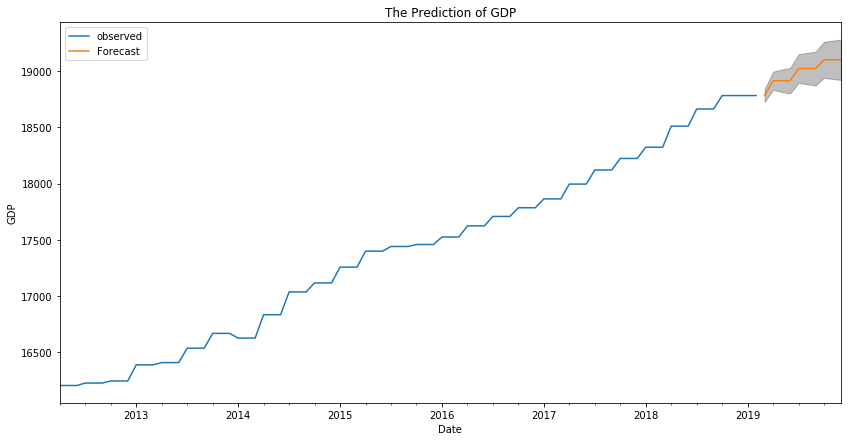

In [352]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('GDP')
plt.legend()
plt.title('The Predicted GDP Fits into The Real GDP')
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error (RMSE) of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('GDP')
plt.legend()
plt.title('The Prediction of GDP')
plt.show()
prediction_GDP = pd.DataFrame(pred_uc.predicted_mean, columns = ['GDP'])

In [353]:
prediction_GDP

,GDP
2019-03-01,18784.632014
2019-04-01,18917.044288
2019-05-01,18917.044320
2019-06-01,18917.044320
2019-07-01,19025.454055
2019-08-01,19025.454055
2019-09-01,19025.454055
2019-10-01,19103.776370
2019-11-01,19103.776370
2019-12-01,19103.776370


In [354]:
y = df['Unemployment'].resample('MS').mean()
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:520.5733704290839
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:435.4136398229758
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:165.0933158194384
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:87.38525657592383
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15.583470573281993


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2.626837994904464
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:69.15761666205889
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:34.46294939335451
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:409.3506321548937


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:340.8977974727532
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:96.69920940769104
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:47.94406565859694
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-14.649269452207442
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-29.91689569164687
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:43.409909603912716
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10.200814924575702
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-79.21764488325523
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-68.18266640826194
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-10.715904029075931
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-55.27599946555671
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-70.50081129283055
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-69.70556374631477
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-44.56360558795741
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-45.442974648653
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-75.3581773116984
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-64.21954062848951


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-16.455552553594085
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-58.05665779089651
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-68.54732156630143
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-65.50540288384832
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-50.20437171212265
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-48.852295446689915
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-93.18186308068378
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-87.32697028017091
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-11.341602373747188
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-57.450051123813836
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-90.47230500425712


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-88.07905660648899
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-44.65975607899764
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-48.82904256541666
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-99.38683978717481
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-94.59105096484531
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-16.41848647372043
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-65.17433492752899
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-100.26066118415582


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-95.0047129177402
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-52.268828124294664
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-59.38939592009811
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-77.35193473483706
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-66.33169120096969
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-10.972481906811897


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-57.53436435624717
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-66.99427713500039
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-67.70552480329589
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-47.81991693448805
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-49.526036440480105
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-73.36052710955789
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-63.07394528886853
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-16.67692882695142
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-56.13191011831613
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-65.70083263689916
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-65.63339820512962


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-47.22878364985849
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-46.856520609381704


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9892      0.001    978.117      0.000       0.987       0.991
ma.L1         -0.4373      0.110     -3.964      0.000      -0.653      -0.221
ar.S.L12      -0.3630      0.121     -3.000      0.003      -0.600      -0.126
sigma2         0.0124      0.002      6.539      0.000       0.009       0.016


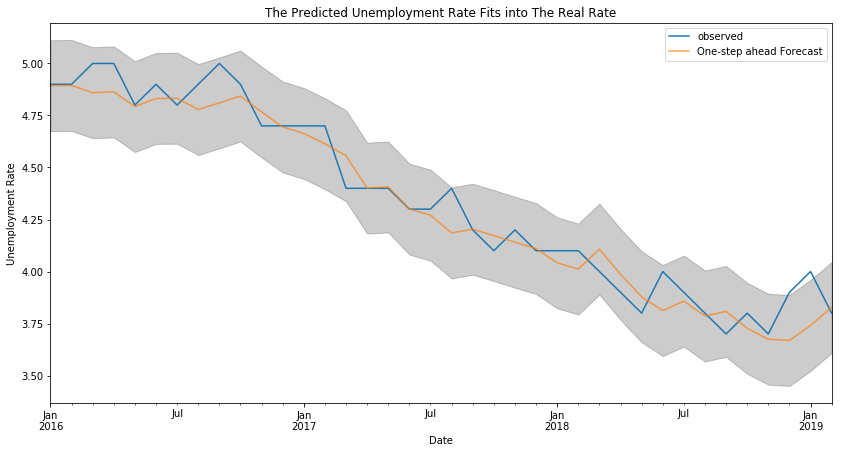

The Mean Squared Error (MSE) of our forecasts is 0.01
The Root Mean Squared Error (RMSE) of our forecasts is 0.1


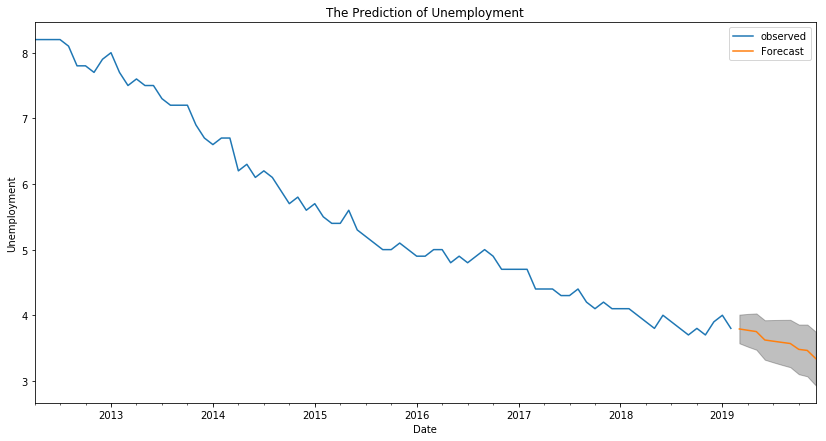

In [355]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate')
plt.legend()
plt.title('The Predicted Unemployment Rate Fits into The Real Rate')
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error (RMSE) of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment')
plt.legend()
plt.title('The Prediction of Unemployment')
plt.show()
prediction_Unemployment = pd.DataFrame(pred_uc.predicted_mean, columns = ['Unemployment'])

In [356]:
prediction_Unemployment

,Unemployment
2019-03-01,3.791207
2019-04-01,3.770913
2019-05-01,3.751230
2019-06-01,3.623259
2019-07-01,3.604777
2019-08-01,3.586887
2019-09-01,3.569582
2019-10-01,3.480261
2019-11-01,3.464107
2019-12-01,3.339626


In [357]:
y = df['EFF'].resample('MS').mean()
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:219.18654213415536
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:156.88653444946124
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:97.59210129980832
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:45.96212901999504
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-37.1526614156146
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-36.857706059878225
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-21.946184302847925


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-18.22759370989579
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:118.27294363276857
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:71.00586812574721
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10.807193067742965
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-24.134434136812736
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-115.4536362437962
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-111.02328344927083
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-83.87515571484658
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-77.74362633328396
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-222.30919597744904
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-201.5418705084968
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-221.00391672399695
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-170.53544000639505
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-222.0013339278893
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-217.26803822745137
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-174.07672663357633
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-168.5404423069891
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-233.

/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-229.6182908856888
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-177.68115494530008


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-175.43069897151383
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-259.74717002969135
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-214.47355452827517
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-228.2384833609139
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-177.03051205544512
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-231.76671446288577
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-226.73229556895146
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-180.69998610765376


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-174.3731672900675
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-238.97111098912666
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-209.32995656159
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-225.3789111454697
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-173.9989753984753
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-223.97658093568407
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-222.00713780404675
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-174.01924126753113
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-172.0196243577597
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-253.4565698340066
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-214.27803803616789
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-223.09292029945456
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-171.61774859114303
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-222.54742464530884
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-217.21210921212077
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-175.56800914110377
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-169.52584338443955


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0436      0.004    243.856      0.000       1.035       1.052
ma.L1          0.0301      0.088      0.343      0.731      -0.142       0.202
sigma2         0.0022      0.000      7.787      0.000       0.002       0.003


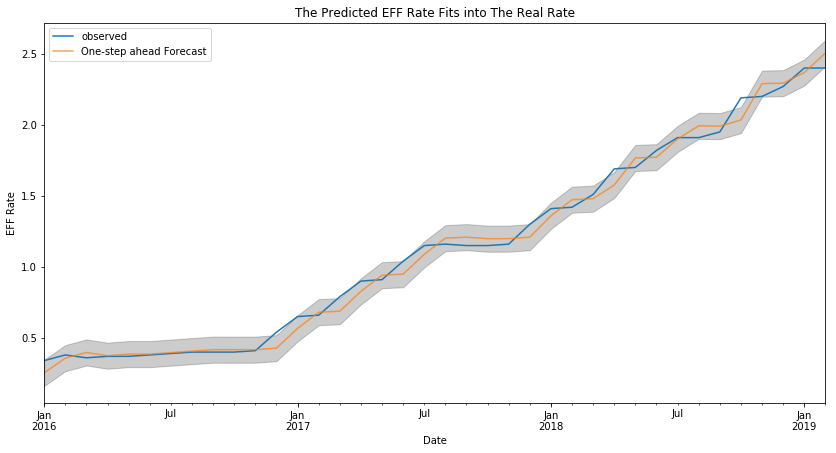

The Mean Squared Error (MSE) of our forecasts is 0.0
The Root Mean Squared Error (RMSE) of our forecasts is 0.06


/Users/wolfeating/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


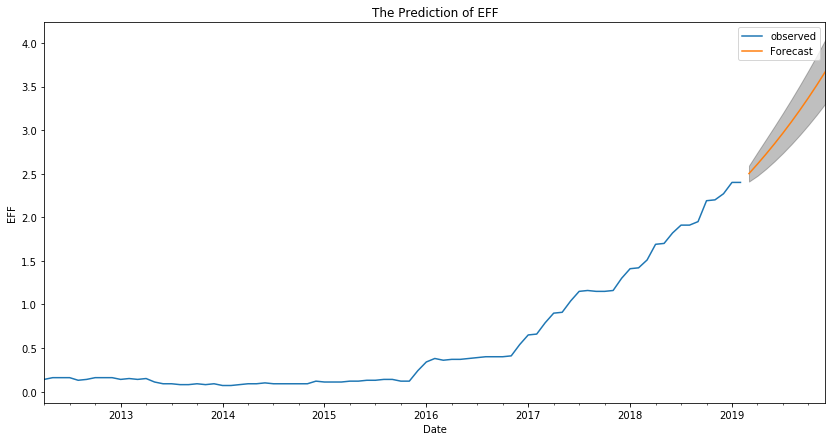

In [358]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('EFF Rate')
plt.legend()
plt.title('The Predicted EFF Rate Fits into The Real Rate')
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2012-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error (RMSE) of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('EFF')
plt.legend()
plt.title('The Prediction of EFF')
plt.show()
prediction_EFF = pd.DataFrame(pred_uc.predicted_mean, columns = ['EFF'])

In [359]:
prediction_EFF

,EFF
2019-03-01,2.501368
2019-04-01,2.610330
2019-05-01,2.724037
2019-06-01,2.842698
2019-07-01,2.966528
2019-08-01,3.095751
2019-09-01,3.230604
2019-10-01,3.371331
2019-11-01,3.518188
2019-12-01,3.671443


In [369]:
df_var = prediction_EFF.merge(prediction_Unemployment, right_index = True, left_index = True)
df_var = df_var.merge(prediction_GDP, right_index = True, left_index = True)
df_var

,EFF,Unemployment,GDP
2019-03-01,2.501368,3.791207,18784.632014
2019-04-01,2.610330,3.770913,18917.044288
2019-05-01,2.724037,3.751230,18917.044320
2019-06-01,2.842698,3.623259,18917.044320
2019-07-01,2.966528,3.604777,19025.454055
2019-08-01,3.095751,3.586887,19025.454055
2019-09-01,3.230604,3.569582,19025.454055
2019-10-01,3.371331,3.480261,19103.776370
2019-11-01,3.518188,3.464107,19103.776370
2019-12-01,3.671443,3.339626,19103.776370


In [370]:
df_var['EFF'] = [log(i) for i in df_var.EFF.values]
df_var['Unemployment'] = [log(i) for i in df_var.Unemployment.values]
df_var['GDP'] = [log(i) for i in df_var.GDP.values]

In [375]:
df_var

,EFF,Unemployment,GDP
2019-03-01,0.916838,1.332684,9.840794
2019-04-01,0.959476,1.327317,9.847819
2019-05-01,1.002115,1.322084,9.847819
2019-06-01,1.044754,1.287374,9.847819
2019-07-01,1.087392,1.282260,9.853533
2019-08-01,1.130031,1.277285,9.853533
2019-09-01,1.172669,1.272449,9.853533
2019-10-01,1.215308,1.247107,9.857641
2019-11-01,1.257946,1.242455,9.857641
2019-12-01,1.300585,1.205859,9.857641


In [378]:
X_NEW = df_var[['EFF', 'GDP', 'Unemployment']]
price = model.predict(X_NEW)

In [379]:
price

2019-03-01    105.507176
2019-04-01    106.308950
2019-05-01    106.984972
2019-06-01    109.199174
2019-07-01    109.965573
2019-08-01    110.628122
2019-09-01    111.283419
2019-10-01    113.078198
2019-11-01    113.723906
2019-12-01    116.036521
Freq: MS, dtype: float64

## Now, I had our EFF Rate of 3.67, GDP of 19103.78, Unemployment Rate of 3.34.

In [253]:
X_new = [log(3.67), log(19103.78), log(3.34)]

In [254]:
price = model.predict(X_new)
print('The JPMC stock price on 12/31/2019 will be $' + str(price.round(2)))

The JPMC stock price on 12/31/2019 will be $[116.03]


## This is my thrid prediction.
## TS and Linear Regression are very simple and basic, so I decided to do something fun, for example, introducing some machine learning methods or creating my own indicators.

In [255]:
df1.to_csv('Variables.csv')
df2.to_csv('log.csv')

## In the following models, I will not use any interpolation for the variables.

## My fourth model is based on the Random Forests.

In [256]:
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [257]:
#import the latest stock price from Yahoo Finance.
stockprice = pd.read_csv('JPM.csv')
#import the varibles.
df = pd.read_csv('Variables.csv')

In [258]:
stockprice = stockprice[['Date', 'Adj Close']]
stockprice['Date'] = pd.to_datetime(stockprice['Date'])

In [259]:
stockprice.Date = pd.to_datetime(stockprice['Date'])

In [260]:
stockprice.head(10)

,Date,Adj Close
0,2012-04-30,35.732433
1,2012-05-01,36.405849
2,2012-05-02,35.915333
3,2012-05-03,35.757378
4,2012-05-04,34.709858
5,2012-05-07,34.734787
6,2012-05-08,34.402245
7,2012-05-09,33.787025
8,2012-05-10,33.870163
9,2012-05-11,30.727568


In [261]:
df.head()

,Date,GDP,Unemployment,CPI,EFF,Inflation,Adj Close,Volume,EFF_log,Unemployment_log,Inflation_log,GDP_log,CPI_log
0,2012-04-01,16198.807,8.2,229.187,0.14,2.26,35.732433,23518000.0,-1.966113,2.104134,0.815365,9.692693,5.434538
1,2012-04-30,16198.807,8.2,229.187,0.14,2.26,35.732433,23518000.0,-1.966113,2.104134,0.815365,9.692693,5.434538
2,2012-05-01,16198.807,8.2,228.713,0.16,2.26,36.405849,26359700.0,-1.832581,2.104134,0.815365,9.692693,5.432468
3,2012-05-02,16198.807,8.2,228.713,0.16,2.26,35.915333,22462200.0,-1.832581,2.104134,0.815365,9.692693,5.432468
4,2012-05-03,16198.807,8.2,228.713,0.16,2.26,35.757378,19536400.0,-1.832581,2.104134,0.815365,9.692693,5.432468


In [262]:
df.keys()

Index(['Date', 'GDP', 'Unemployment', 'CPI', 'EFF', 'Inflation', 'Adj Close',
       'Volume', 'EFF_log', 'Unemployment_log', 'Inflation_log', 'GDP_log',
       'CPI_log'],
      dtype='object')

In [263]:
df.drop(['Adj Close', 'Volume', 'CPI_log','Unemployment_log', 'EFF_log', 'Inflation_log', 'GDP_log'],
        axis = 1, inplace = True)
df.Date = pd.to_datetime(df['Date'])

In [264]:
df.head()

,Date,GDP,Unemployment,CPI,EFF,Inflation
0,2012-04-01,16198.807,8.2,229.187,0.14,2.26
1,2012-04-30,16198.807,8.2,229.187,0.14,2.26
2,2012-05-01,16198.807,8.2,228.713,0.16,2.26
3,2012-05-02,16198.807,8.2,228.713,0.16,2.26
4,2012-05-03,16198.807,8.2,228.713,0.16,2.26


In [265]:
df['Month'] = [str(i).split('-')[1] for i in df.Date.values]
df['Year'] = [str(i).split('-')[0] for i in df.Date.values]

In [266]:
df.head()

,Date,GDP,Unemployment,CPI,EFF,Inflation,Month,Year
0,2012-04-01,16198.807,8.2,229.187,0.14,2.26,04,2012
1,2012-04-30,16198.807,8.2,229.187,0.14,2.26,04,2012
2,2012-05-01,16198.807,8.2,228.713,0.16,2.26,05,2012
3,2012-05-02,16198.807,8.2,228.713,0.16,2.26,05,2012
4,2012-05-03,16198.807,8.2,228.713,0.16,2.26,05,2012


In [267]:
df = df.merge(stockprice, left_on = 'Date', right_on = 'Date', how = 'inner')

In [268]:
if df.empty:
    print('DataFrame is empty!')
elif df.isnull().any().any() == False:
    print('Good to go!')
else:
    print('There is ' + str(df.isnull().sum().sum()) + ' missing value.')
    print(df.isnull().any())

Good to go!


In [269]:
df['Adj Close'].fillna(method = 'ffill', inplace = True)
df['Adj Close'].fillna(method = 'bfill', inplace = True)

In [270]:
df.rename(columns = {'Adj Close': 'Price'}, inplace = True)

In [271]:
df.drop(['Date', 'CPI', 'Inflation'], axis = 1, inplace = True)

In [272]:
df.to_csv('RFR.csv')
print('DataFrame for Random Forest Regression has successfully exported.')

DataFrame for Random Forest Regression has successfully exported.


In [273]:
df = pd.read_csv('RFR.csv')

In [274]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,GDP,Unemployment,EFF,Month,Year,Price
0,16198.807,8.2,0.14,4,2012,35.732433
1,16198.807,8.2,0.16,5,2012,36.405849
2,16198.807,8.2,0.16,5,2012,35.915333
3,16198.807,8.2,0.16,5,2012,35.757378
4,16198.807,8.2,0.16,5,2012,34.709858


In [275]:
df.describe()

,GDP,Unemployment,EFF,Month,Year,Price
count,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000,1732.000000
mean,17424.351586,5.533718,0.605156,6.582564,2015.263279,66.181313
std,797.142784,1.392509,0.701586,3.431192,2.014383,25.000535
min,16198.807000,3.700000,0.070000,1.000000,2012.000000,25.772583
25%,16663.649000,4.400000,0.110000,4.000000,2014.000000,48.861102
50%,17456.225000,5.000000,0.160000,7.000000,2015.000000,57.253442
75%,17995.150000,6.700000,1.040000,10.000000,2017.000000,86.866423
max,18784.632000,8.200000,2.400000,12.000000,2019.000000,116.856049


In [276]:
X = df.iloc[:, 0:5].values  
y = df.iloc[:, 5].values  

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [278]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [279]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [280]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.287940587019369
Mean Squared Error: 3.2581267533607363
Root Mean Squared Error: 1.8050281863064455


### With 200 trees, the root mean squared error is 1.81, which is less than 10 percent of the average price (66.18). Therefore, it seems we have used enough trees for this prediction.

In [281]:
model = regressor.fit(X,y)  

## I already had our EFF Rate of 3.67, GDP of 19103.78, Unemployment Rate of 3.34 for 12/31/2019.

In [282]:
X_new = {'GDP': 19103.78, 
         'Unemployment': 3.34, 
         'EFF': 3.67, 
         'Month': 1, 
         'Year': 2020}
X_new = pd.DataFrame(X_new, index = {0})
X_new

,GDP,Unemployment,EFF,Month,Year
0,19103.78,3.34,3.67,1,2020


In [283]:
Y_pred = model.predict(X_new)
print('Based on the Random Forest Regression, the predition is ' + str(Y_pred))

Based on the Random Forest Regression, the predition is [103.4968681]


# Resource
##### What factors are the primary drivers of banks' share prices?
https://www.investopedia.com/ask/answers/041015/why-trading-volume-important-investors.asp